In [ ]:
#https://scikit-learn.org/stable/modules/svm.html#kernel-functions

# Predicting default of a credit card holder

## Data Description
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

### Content
There are 25 variables:

<br>**Customer ID**: ID of each client
<br>**Credit_Amount**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
<br>**Gender**: sex (1=male, 2=female)
<br>**Academic_Qualification**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
<br>**Marital**: Marital status (1=married, 2=single, 3=others)
<br>**Age_Years**: Age in years
<br>**Repayment_Status_Jan**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
<br>**Repayment_Status_Feb**: Repayment status in August, 2005 (scale same as above)
<br>**Repayment_Status_March**: Repayment status in July, 2005 (scale same as above)
<br>**Repayment_Status_April**: Repayment status in June, 2005 (scale same as above)
<br>**Repayment_Status_May**: Repayment status in May, 2005 (scale same as above)
<br>**Repayment_Status_June**: Repayment status in April, 2005 (scale same as above)
<br>**Jan_Bill_Amount**: Amount of bill statement in September, 2005 (NT dollar)
<br>**Feb_Bill_Amount**: Amount of bill statement in August, 2005 (NT dollar)
<br>**March_Bill_Amount**: Amount of bill statement in July, 2005 (NT dollar)
<br>**April_Bill_Amount**: Amount of bill statement in June, 2005 (NT dollar)
<br>**May_Bill_Amount**: Amount of bill statement in May, 2005 (NT dollar)
<br>**June_Bill_Amount**: Amount of bill statement in April, 2005 (NT dollar)
<br>**Previous_Payment_Jan**: Amount of previous payment in September, 2005 (NT dollar)
<br>**Previous_Payment_Feb**: Amount of previous payment in August, 2005 (NT dollar)
<br>**Previous_Payment_March**: Amount of previous payment in July, 2005 (NT dollar)
<br>**Previous_Payment_April**: Amount of previous payment in June, 2005 (NT dollar)
<br>**Previous_Payment_May**: Amount of previous payment in May, 2005 (NT dollar)
<br>**Previous_Payment_June**: Amount of previous payment in April, 2005 (NT dollar)
<br>**Default_Payment**: Default payment (1=yes, 0=no)

## Import Libraries

In [1]:
import os as os

In [2]:
os.chdir("C:\\Users\\kunal\\OneDrive\\Desktop\\Training 1\\SVM")

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'BankCreditCard.csv',
 'iris.data',
 'Log_ROC.png',
 'mariral_vs_pur_stack.png',
 'Problem Statement.docx',
 'Supervised Learning_Support Vector Machines - Part2.pptx',
 'SVC_ROC.png',
 'SVM_Bank_Credit_Card-Copy1_Shared.ipynb',
 'SVM_Bank_Credit_Card.ipynb',
 'Untitled.ipynb']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
#warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore", category=UserWarning)

In [12]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Load Data

In [6]:
df_credit_card = pd.read_csv('BankCreditCard.csv');df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

In [8]:
df_credit_card.Gender=df_credit_card.Gender.astype('object')
df_credit_card.Academic_Qualification=df_credit_card.Academic_Qualification.astype('object')
df_credit_card.Marital=df_credit_card.Marital.astype('object')




In [9]:
df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  object 
 3   Academic_Qualification  30000 non-null  object 
 4   Marital                 30000 non-null  object 
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

In [10]:
df_credit_card.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.00,2,2,1,24,2,2,0,0,...,0.00,0.00,0.00,0.00,679.00,0.00,0.00,0.00,0.00,1
1,2,220000.00,2,2,2,26,0,2,0,0,...,3272.00,3455.00,3261.00,0.00,2000.00,1000.00,1000.00,0.00,2000.00,1
2,3,90000.00,2,2,2,34,0,0,0,0,...,24332.00,14848.00,15548.00,1619.00,2500.00,1000.00,1000.00,1000.00,5000.00,0
3,4,50000.00,2,2,1,37,0,0,0,0,...,29324.00,28858.00,28547.00,3000.00,2029.00,1200.00,1100.00,1069.00,1000.00,0
4,5,50000.00,1,2,1,57,0,0,0,0,...,20940.00,18146.00,18131.00,3000.00,36672.00,10000.00,9000.00,689.00,679.00,0


In [11]:
df_credit_card.describe(include=np.number)

,Customer ID,Credit_Amount,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,...,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,15000.50,192917.32,35.49,0.36,0.32,0.30,0.26,0.22,0.22,81581.06,...,55122.26,39939.62,38506.05,6285.65,7466.54,5836.14,5127.69,5261.19,5215.50,0.22
std,8660.40,132288.75,9.22,0.75,0.80,0.78,0.74,0.70,0.70,123026.37,...,83577.33,60373.93,59104.28,18944.92,34679.50,20696.31,17103.76,16989.51,17777.47,0.42
min,1.00,20000.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00,-365580.00,...,-270000.00,-81334.00,-338603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7500.75,50000.00,28.00,0.00,0.00,0.00,0.00,0.00,0.00,3890.00,...,2671.50,1763.00,1256.00,1000.00,770.00,550.00,333.00,310.00,117.75,0.00
50%,15000.50,220000.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,35661.50,...,25629.00,18043.00,17071.00,3000.00,2542.00,1900.00,1500.00,1539.00,1500.00,0.00
75%,22500.25,270000.00,41.00,0.00,0.00,0.00,0.00,0.00,0.00,67091.00,...,54508.50,50190.50,48655.25,6000.00,5000.00,5500.00,4013.25,5000.00,4000.00,0.00
max,30000.00,2000000.00,79.00,6.00,6.00,6.00,6.00,6.00,6.00,964533.00,...,992596.00,827171.00,861664.00,973663.00,2674259.00,999055.00,538897.00,536539.00,528666.00,1.00


In [12]:
df_credit_card.describe(include=object)

,Gender,Academic_Qualification,Marital
count,30000,30000,30000
unique,2,6,4
top,2,2,2
freq,18112,14030,15964


Let's have a look at all the columns present in the dataset

In [13]:
df_credit_card.columns

Index(['Customer ID', 'Credit_Amount', 'Gender', 'Academic_Qualification',
       'Marital', 'Age_Years', 'Repayment_Status_Jan', 'Repayment_Status_Feb',
       'Repayment_Status_March', 'Repayment_Status_April',
       'Repayment_Status_May', 'Repayment_Status_June', 'Jan_Bill_Amount',
       'Feb_Bill_Amount', 'March_Bill_Amount', 'April_Bill_Amount',
       'May_Bill_Amount', 'June_Bill_Amount', 'Previous_Payment_Jan',
       'Previous_Payment_Feb', 'Previous_Payment_March',
       'Previous_Payment_April', 'Previous_Payment_May',
       'Previous_Payment_June', 'Default_Payment'],
      dtype='object')

Let's check data types of each column

In [14]:
df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  object 
 3   Academic_Qualification  30000 non-null  object 
 4   Marital                 30000 non-null  object 
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

Remove "Customer ID" since all the values are unique and does not contribute any information for analysis

In [8]:
#Drop customer id column
df_credit_card.drop('Customer ID', axis=1,inplace=True);

# Exploratory data analysis

# Credit amount availed by the customers

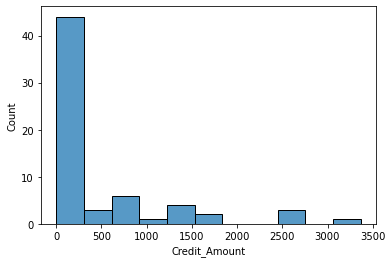

In [14]:
sns.histplot(df_credit_card.Credit_Amount.value_counts());plt.show()

#using value counts as without it the plot was showing values using scientific notation

Let's have a look at the Default Payment, Gender, Academic Qualification, Marital demographics of the data.

### Default Payment

In [17]:
#counts each category in default payment variable
df_credit_card['Default_Payment'].value_counts() #problem of class imbalance??

0    23364
1     6636
Name: Default_Payment, dtype: int64

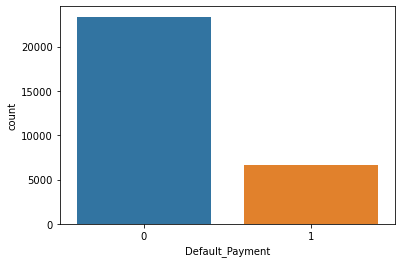

In [18]:
sns.countplot(x='Default_Payment', data=df_credit_card)
plt.show()

23364 observations are 0 where 0 means No and 6636 observations are 1 where 1 means Yes in the target variable

### Gender

In [19]:
df_credit_card['Gender'].value_counts()

2    18112
1    11888
Name: Gender, dtype: int64

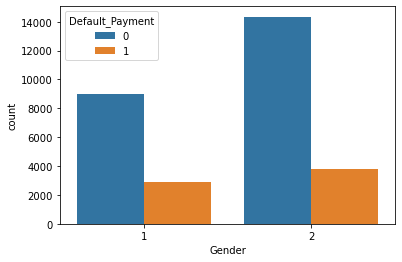

In [20]:
sns.countplot(x='Gender',hue='Default_Payment',data=df_credit_card);
plt.show()

The number of female credit card holders are higher than the number of male credit card holders.

There are 11888 male and 18112 female credit card holders.

### Marital

Marital

1=Married, 2=Single, 3= Do not prefer to say, 0=no information

In [21]:
df_credit_card['Marital'].value_counts()


2    15964
1    13659
3      323
0       54
Name: Marital, dtype: int64

In [22]:
pd.crosstab(df_credit_card.Marital,df_credit_card.Default_Payment)

Default_Payment,0,1
Marital,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


1=Married, 2=Single, 3= Do not prefer to say, 0=no information

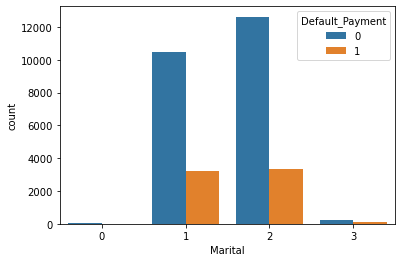

In [23]:
sns.countplot(x='Marital',hue='Default_Payment',data=df_credit_card)
plt.show()

From the above plot we can say that most of the credit card holders are 'single', followed by married credit card holders

### Compare "Academic Qualification" with "Default Payment"

In [24]:
df_credit_card['Academic_Qualification'].value_counts()

#Ug-G-PG-Prof-Other-Not known

2    14030
1    10585
3     4917
5      280
4      123
6       65
Name: Academic_Qualification, dtype: int64

In [25]:
pd.crosstab(df_credit_card.Default_Payment,df_credit_card.Academic_Qualification)

Academic_Qualification,1,2,3,4,5,6
Default_Payment,,,,,,
0,8549,10700,3680,116,262,57
1,2036,3330,1237,7,18,8


Text(0, 0.5, 'Default Payment')

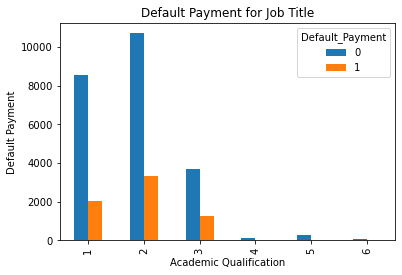

In [26]:
%matplotlib inline
pd.crosstab(df_credit_card.Academic_Qualification,df_credit_card.Default_Payment).plot(kind='bar')
plt.title('Default Payment for Job Title')
plt.xlabel('Academic Qualification')
plt.ylabel('Default Payment')


1=Undergraduate, 2=Graduate, 3=Postgraduate, 4=Professional, 5=Others, 6=Unknown.

The above plot shows most of the credit card holders are students.

The above charts shows the default payment status of Undergraduates, graduates and post-graduates. Blue bar shows customers who will not be paying in the next month, whereas orange bar shows payment to be done in the next month.

### Correlation Matrix

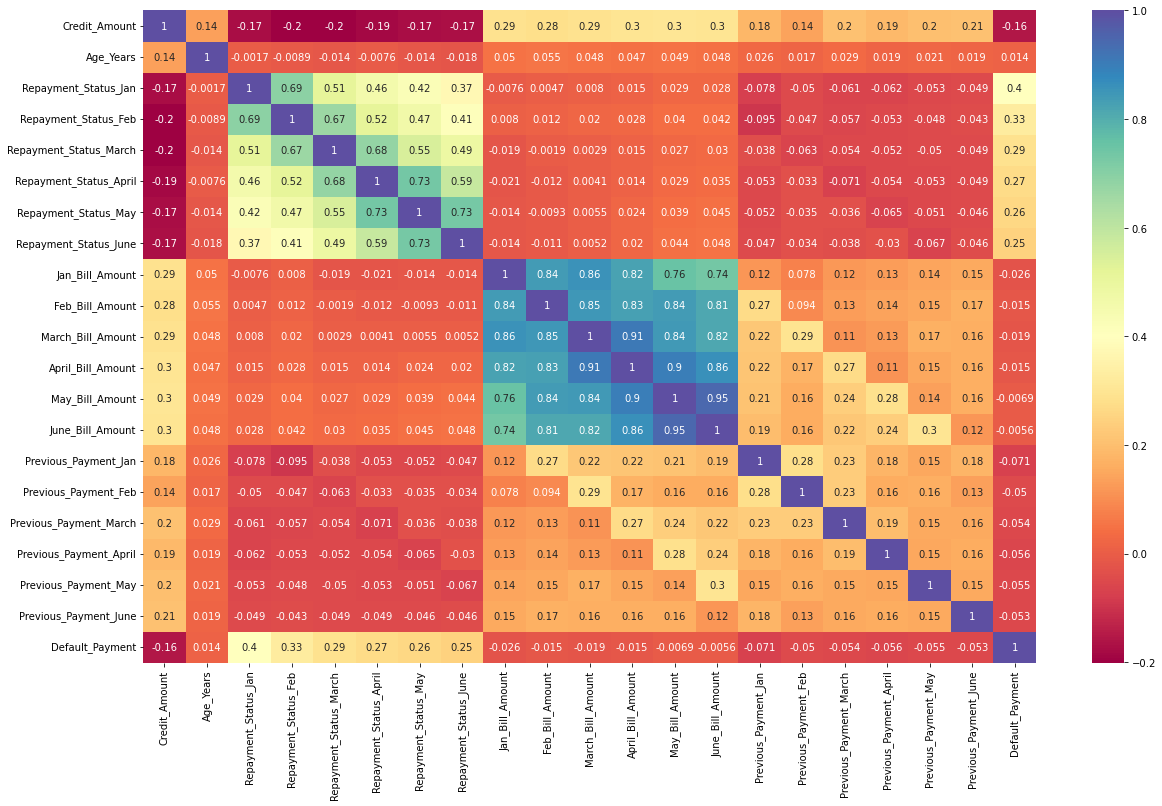

In [27]:
#calculating correlation among numeric variable 
corr_matrix = df_credit_card.corr() 

#plot correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix,
            cmap='Spectral',
            annot=True);

The above result shows all independent variables are slightly correlated with target variable. But independent variables have multicolinearity. For example: "March_Bill_Amount" is highly correlated with "April_Bill_Amount". 

In [28]:
df_credit_card=pd.get_dummies(df_credit_card,drop_first=True)

In [16]:
df_credit_card.shape

(30000, 24)

### Splitting the dataset into input and output 

In [15]:
X = df_credit_card.drop('Default_Payment',axis=1)
y = df_credit_card.loc[:,'Default_Payment']

### Standardizing input variables


In [30]:
from sklearn.preprocessing import StandardScaler  

# standardized the dataset
sc_x = StandardScaler()    
X_std = sc_x.fit_transform(X)

# Implementing support vector classifier

### Splitting input data into training dataset and testing dataset

In [31]:
#import train and test split module from sklearn
from sklearn.model_selection import train_test_split

#split train and test datset
X_train, X_test, y_train, y_test = train_test_split(X_std, y,test_size=0.3, random_state=0, stratify=y)

## Linear Kernel


###  Create the support vector classifier model 

In [21]:
from sklearn.svm import SVC # "Support vector classifier"

In [22]:
linear_svc = SVC(kernel='linear', C=1.0,random_state=42)

In [34]:
#?SVC

### Training the model

In [35]:
linear_svc.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [36]:
linear_svc.support_vectors_

array([[ 0.35591432,  1.14067961,  2.20195843, ..., -0.91426088,
         0.93767172, -0.10432569],
       [ 0.28032085, -1.24601985, -0.47552021, ..., -0.91426088,
         0.93767172, -0.10432569],
       [ 0.4315078 , -0.16115646,  0.86321911, ..., -0.91426088,
         0.93767172, -0.10432569],
       ...,
       [-1.08036172, -0.92056083,  0.86321911, ..., -0.91426088,
         0.93767172, -0.10432569],
       [ 0.05354042,  1.79159765,  0.86321911, ...,  1.09377971,
        -1.06647132, -0.10432569],
       [-0.77798782,  0.92370693,  0.86321911, ...,  1.09377971,
        -1.06647132, -0.10432569]])

In [37]:
len(linear_svc.support_vectors_[0])

29

### Making Predictions


In [38]:
linear_svc_pred_test =linear_svc.predict(X_test)

In [39]:
linear_svc_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
np.unique(linear_svc_pred_test,return_counts=True)

(array([0, 1], dtype=int64), array([7926, 1074], dtype=int64))

In [42]:
y_test[0:].value_counts()

0    7009
1    1991
Name: Default_Payment, dtype: int64

### Evaluating the Algorithm


### Confusion matrix

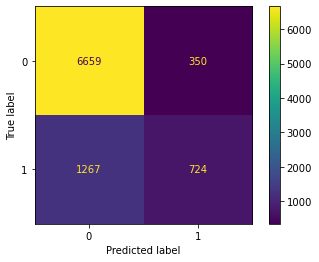

In [43]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, linear_svc_pred_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1"])

cm_display.plot()
plt.show()

### Classification report

In [44]:
#import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, linear_svc_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.36      0.47      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

### ROC Curve

In [18]:
#import metrics from sklearn to calculate auc score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

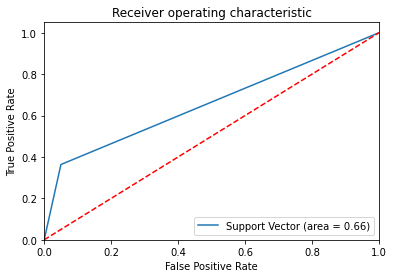

In [47]:


#Prediction on test data based on the number of thresholds and calculate the false positive rate and true positive rate.

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,linear_svc_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

# create a figure object
plt.figure()

#plot false positive rate value and true positive rate value and area under curve value
plt.plot(false_positive_rate, true_positive_rate, label='Support Vector (area = %0.2f)' % roc_auc)

#dignal dotted red line
plt.plot([0, 1], [0, 1],'r--')

#x-axis limitation
plt.xlim([0.0, 1.0])

#y-axis limitaion
plt.ylim([0.0, 1.05])

#x-axis label
plt.xlabel('False Positive Rate')

#y-axis label
plt.ylabel('True Positive Rate')

#title for plot
plt.title('Receiver operating characteristic')

#print legend on lower right
plt.legend(loc="lower right")


#print the plot
plt.show()

Roc curve is a plot of true positive rate versus false positive rate. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. The area under the curve (AUC) is a measure of test accuracy. When AUC is 0.66, it means there is 66% chance that model will be able to distinguish between positive class and negative class

## Radial Basis Function Kernel

In [23]:
#SVC with RBF kernel
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=1.0)


In [49]:
rbf_svc.fit(X_train,y_train)

SVC(gamma=0.7)

In [50]:
rbf_svc.support_vectors_

array([[ 1.26303604, -1.13753351, -0.47552021, ..., -0.91426088,
         0.93767172, -0.10432569],
       [ 0.35591432,  1.14067961,  2.20195843, ..., -0.91426088,
         0.93767172, -0.10432569],
       [ 0.50710128,  0.05581622, -0.47552021, ...,  1.09377971,
        -1.06647132, -0.10432569],
       ...,
       [-1.08036172, -0.92056083,  0.86321911, ..., -0.91426088,
         0.93767172, -0.10432569],
       [ 0.05354042,  1.79159765,  0.86321911, ...,  1.09377971,
        -1.06647132, -0.10432569],
       [-0.77798782,  0.92370693,  0.86321911, ...,  1.09377971,
        -1.06647132, -0.10432569]])

### Making Predictions


In [51]:
rbf_pred_test = rbf_svc.predict(X_test)

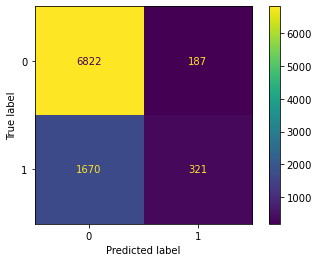

In [52]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, rbf_pred_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1"])

cm_display.plot()
plt.show()

In [53]:
#import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, rbf_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7009
           1       0.63      0.16      0.26      1991

    accuracy                           0.79      9000
   macro avg       0.72      0.57      0.57      9000
weighted avg       0.77      0.79      0.74      9000



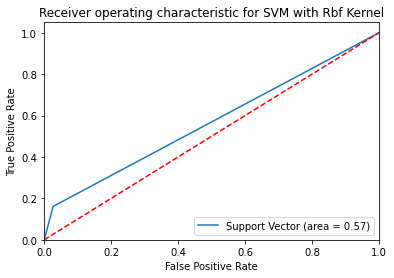

In [54]:
#Prediction on test data based on the number of thresholds and calculate the false positive rate and true positive rate.

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,rbf_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

# create a figure object
plt.figure()

#plot false positive rate value and true positive rate value and area under curve value
plt.plot(false_positive_rate, true_positive_rate, label='Support Vector (area = %0.2f)' % roc_auc)

#dignal dotted red line
plt.plot([0, 1], [0, 1],'r--')

#x-axis limitation
plt.xlim([0.0, 1.0])

#y-axis limitaion
plt.ylim([0.0, 1.05])

#x-axis label
plt.xlabel('False Positive Rate')

#y-axis label
plt.ylabel('True Positive Rate')

#title for plot
plt.title('Receiver operating characteristic for SVM with Rbf Kernel')

#print legend on lower right
plt.legend(loc="lower right")


#print the plot
plt.show()

#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.



## Let's learn about hyperparameters for  SVM

### C 
It is the regularization parameter, C, of the error term.


### kernel 
It specifies the kernel type to be used in the algorithm. It can be ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’, or a callable. The default value is ‘rbf’.

### degree 
 It is the degree of the polynomial kernel function (‘poly’) and is ignored by all other kernels. The default value is 3.

### gamma 
 It is the kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’. If gamma is ‘auto’, then 1/n_features will be used instead.

### coef0 
Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.

### shrinking 
Whether to use the shrinking heuristic.

### probability 
Whether to enable probability estimates. This must be enabled prior to calling fit, and will slow down that method.

### tol 
Tolerance for stopping criterion.

### cache_size 
Specify the size of the kernel cache (in MB).

### class_weight 
Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

### verbose 
Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in libsvm that, if enabled, may not work properly in a multithreaded context.

### max_iter
Hard limit on iterations within solver, or -1 for no limit.

### decision_function_shape 
Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used as multi-class strategy.



# Polynomial Kernel

In [55]:
# SVC with polynomial (degree 3) kernel
poly_svc = SVC(kernel='poly', degree=3, C=1.0)

In [56]:
# ignore the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

poly_svc.fit(X_train,y_train)

SVC(kernel='poly')

### Making Predictions


In [57]:
pred_test_poly = poly_svc.predict(X_test)

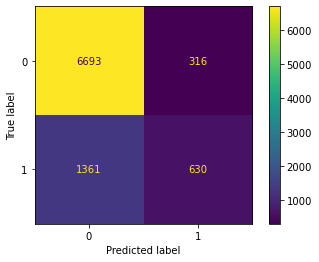

In [58]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, pred_test_poly)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1"])

cm_display.plot()
plt.show()

In [59]:
#import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test_poly))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7009
           1       0.67      0.32      0.43      1991

    accuracy                           0.81      9000
   macro avg       0.75      0.64      0.66      9000
weighted avg       0.79      0.81      0.79      9000



# Handling class imbalance problem 


In [60]:
df_credit_card=pd.get_dummies(df_credit_card,drop_first=True)

# Making use of Oversampling

In [61]:
#Understanding the imbalanced proportion defaulters and non defaulters

df_defaulters_count,df_non_defaulters_count=df_credit_card.Default_Payment.value_counts()

In [62]:
#Splitting/dividing the entire datasetby class 

df_defaulters_0=df_credit_card[df_credit_card['Default_Payment']==0]

df_defaulters_1=df_credit_card[df_credit_card['Default_Payment']==1]


In [63]:
df_defaulters_count,df_non_defaulters_count

(23364, 6636)

In [64]:
df_defaulters_0.shape

(23364, 30)

In [65]:
df_defaulters_1.shape

(6636, 30)

In [66]:
#Technique 2 ----Oversampling

df_defaulters_1_over_sampled=df_defaulters_1.sample(23364,replace=True)

df_defaulters_1_over_sampled.shape

(23364, 30)

In [67]:
#combining the df_defaulters_1_over_sampled and df_defaulters_0

df_over_sampled=pd.concat([df_defaulters_0,df_defaulters_1_over_sampled],axis=0)

In [68]:
df_over_sampled.shape

(46728, 30)

In [69]:
X = df_over_sampled.drop('Default_Payment',axis=1)
y = df_over_sampled.loc[:,'Default_Payment']

In [70]:
from sklearn.preprocessing import StandardScaler  

# standardized the dataset
sc_x = StandardScaler()    
X_std = sc_x.fit_transform(X)

In [71]:
#import train and test split module from sklearn
from sklearn.model_selection import train_test_split

#split train and test datset
X_train, X_test, y_train, y_test = train_test_split(X_std, y,test_size=0.3, random_state=0, stratify=y)

In [72]:
linear_svc = SVC(kernel='rbf', C=1.0,random_state=42)

In [73]:
linear_svc.fit(X_train,y_train)

SVC(random_state=42)

In [74]:
smot_lin_svc_pred_test =linear_svc.predict(X_test)

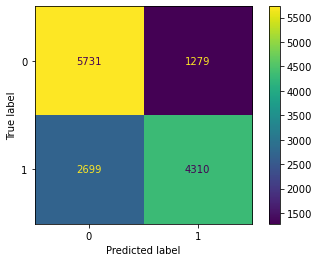

In [75]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, smot_lin_svc_pred_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1"])

cm_display.plot()
plt.show()

In [76]:
#import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, smot_lin_svc_pred_test))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74      7010
           1       0.77      0.61      0.68      7009

    accuracy                           0.72     14019
   macro avg       0.73      0.72      0.71     14019
weighted avg       0.73      0.72      0.71     14019



# Training the model with grid search

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
model_grid_search = SVC(kernel='rbf')

In [79]:
param_grid = {"C": [0.0001,0.001, 0.01, 0.1, 1],
              "gamma": [0.0001, 0.001, 0.01, 0.1, 1],
              }


In [ ]:
# ignore the deprecation warning
#warnings.filterwarnings("ignore", category=DeprecationWarning)

#create grid search object
#grid_search = GridSearchCV(model_grid_search, param_grid=param_grid)

#grid_search.fit(X_train, y_train);

Print best parameter values

In [ ]:
# View the accuracy score
print('Best score for data1:', grid_search.best_score_) 

In [ ]:
# View the best parameters for the model found using grid search
print('Best C:',grid_search.best_estimator_.C) 
print('Best n_iter:',grid_search.best_estimator_.gamma)

Build a model using best parameters

In [ ]:
model_grid = SVC(kernel='rbf', C=1, gamma=0.001)

Training the model

In [ ]:
# ignore the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

model_grid.fit(X_train,y_train)

Making Predictions

In [ ]:
pred_test = model_grid.predict(X_test)

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,pred_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1"])

cm_display.plot()
plt.show()

In [ ]:
#import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, smot_lin_svc_pred_test))

A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.

In [ ]:
#Important:Those who are interested in knowing the kernel function in details 
#stanford lecture of Prof Roger Peng
# starting 1:00:00 to the end ----last 20 minutes
# https://www.youtube.com/watch?v=8NYoQiRANpg